In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["axes.axisbelow"] = True

# SOCME comparison

In [2]:
tmp = np.loadtxt("pysoc_deriv_soc_T1_S0.data")
t1s0_pysoc_deriv = np.sqrt(np.sum(tmp**2)) / 3.0

tmp = np.loadtxt("orca_zeff_soc_T1_S0.data")
t1s0_orca_zeff = np.sqrt(np.sum(tmp**2)) / 3.0

tmp = np.loadtxt("orca_mean_soc_T1_S0.data")
t1s0_orca_mean = np.sqrt(np.sum(tmp**2)) / 3.0

tmp = np.loadtxt("pysoc_deriv_soc_T1_S1.data")
t1s1_pysoc_deriv = np.sqrt(np.sum(tmp**2)) / 3.0

tmp = np.loadtxt("orca_zeff_soc_T1_S1.data")
t1s1_orca_zeff = np.sqrt(np.sum(tmp**2)) / 3.0

tmp = np.loadtxt("orca_mean_soc_T1_S1.data")
t1s1_orca_mean = np.sqrt(np.sum(tmp**2)) / 3.0

In [3]:
print("T1-S0")
print(f"PySOC deriv: {t1s0_pysoc_deriv:.6f}")
print(f"ORCA zeff:   {t1s0_orca_zeff:.6f}")
print(f"ORCA mean:   {t1s0_orca_mean:.6f}")

print("T1-S1")
print(f"PySOC deriv: {t1s1_pysoc_deriv:.6f}")
print(f"ORCA zeff:   {t1s1_orca_zeff:.6f}")
print(f"ORCA mean:   {t1s1_orca_mean:.6f}")


T1-S0
PySOC deriv: 30.679905
ORCA zeff:   30.681724
ORCA mean:   29.260885
T1-S1
PySOC deriv: 47.375671
ORCA zeff:   47.427194
ORCA mean:   44.964376


# SOCME derivaitve comparison

In [4]:
tmp = np.loadtxt("pysoc_deriv_vsoc_T1_S0.data")
vt1s0_pysoc_deriv = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

tmp = np.loadtxt("orca_zeff_vsoc_T1_S0.data")
vt1s0_orca_zeff = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

tmp = np.loadtxt("orca_mean_vsoc_T1_S0.data")
vt1s0_orca_mean = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

tmp = np.loadtxt("pysoc_deriv_vsoc_T1_S1.data")
vt1s1_pysoc_deriv = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

tmp = np.loadtxt("orca_zeff_vsoc_T1_S1.data")
vt1s1_orca_zeff = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

tmp = np.loadtxt("orca_mean_vsoc_T1_S1.data")
vt1s1_orca_mean = np.sqrt(np.sum(tmp**2, axis=1)) / 3.0

Maximum relative Error (thresh=0.1) is 0.016 44
Maximum relative Error (thresh=0.1) is 0.074 44


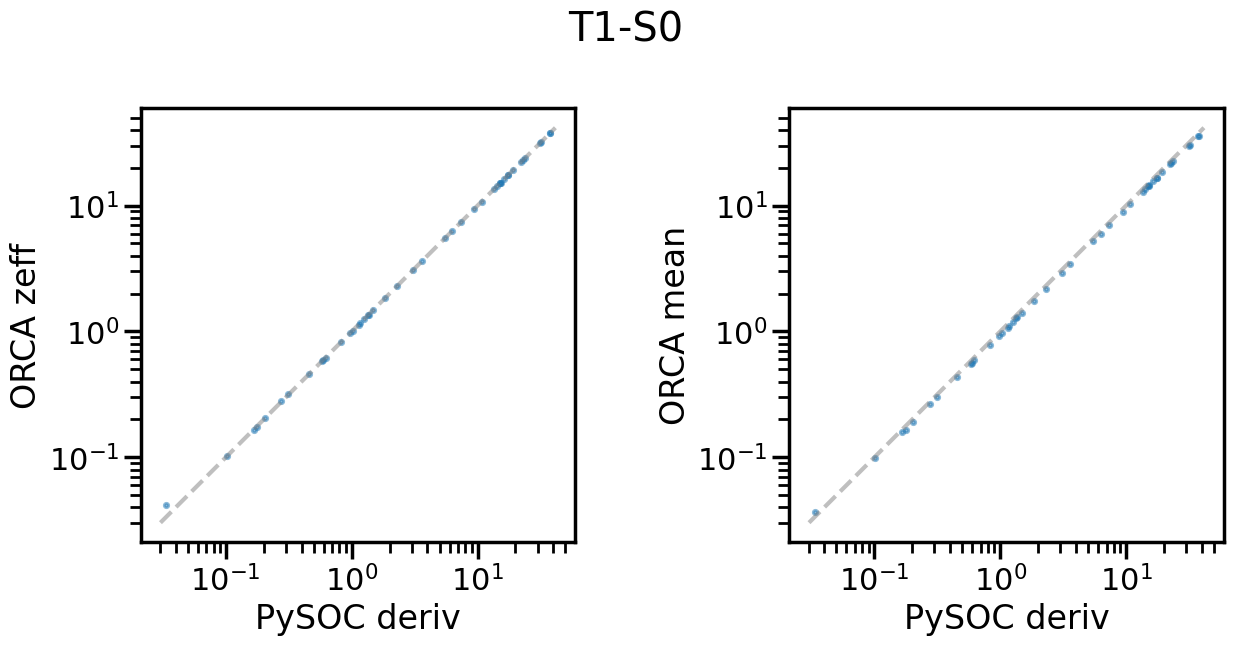

In [5]:
ncol = 2
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow, tight_layout=True)

x = y = np.linspace(min(np.abs(vt1s0_pysoc_deriv)) * 0.9, max(np.abs(vt1s0_pysoc_deriv)) * 1.1)
axes[0].plot(x, y, color="gray", alpha=0.5, linestyle="--")
axes[1].plot(x, y, color="gray", alpha=0.5, linestyle="--")

axes[0].scatter(
    vt1s0_pysoc_deriv.flatten(),
    vt1s0_orca_zeff.flatten(),
    s=10,
    alpha=0.5,
)
axes[1].scatter(
    vt1s0_pysoc_deriv.flatten(),
    vt1s0_orca_mean.flatten(),
    s=10,
    alpha=0.5,
)

axes[0].set_ylabel("ORCA zeff")
axes[1].set_ylabel("ORCA mean")
fig.suptitle("T1-S0")
for i in range(2):
    axes[i].set_xlabel("PySOC deriv")
    axes[i].set_aspect("equal")
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")

thresh = 1e-1
vt1s0_pysoc_deriv_th = vt1s0_pysoc_deriv[vt1s0_pysoc_deriv > thresh]
vt1s0_orca_zeff_th = vt1s0_orca_zeff[vt1s0_pysoc_deriv > thresh]
vt1s0_orca_mean_th = vt1s0_orca_mean[vt1s0_pysoc_deriv > thresh]
diff = np.abs(vt1s0_pysoc_deriv_th - vt1s0_orca_zeff_th) / np.abs(vt1s0_pysoc_deriv_th)
print(f"Maximum relative Error ({thresh=}) is {max(diff.flatten()):.3f}", len(diff.flatten()))
diff = np.abs(vt1s0_pysoc_deriv_th - vt1s0_orca_mean_th) / np.abs(vt1s0_pysoc_deriv_th)
print(f"Maximum relative Error ({thresh=}) is {max(diff.flatten()):.3f}", len(diff.flatten()))

Maximum relative Error (thresh=1.0) is 0.011 28
Maximum relative Error (thresh=1.0) is 0.071 28


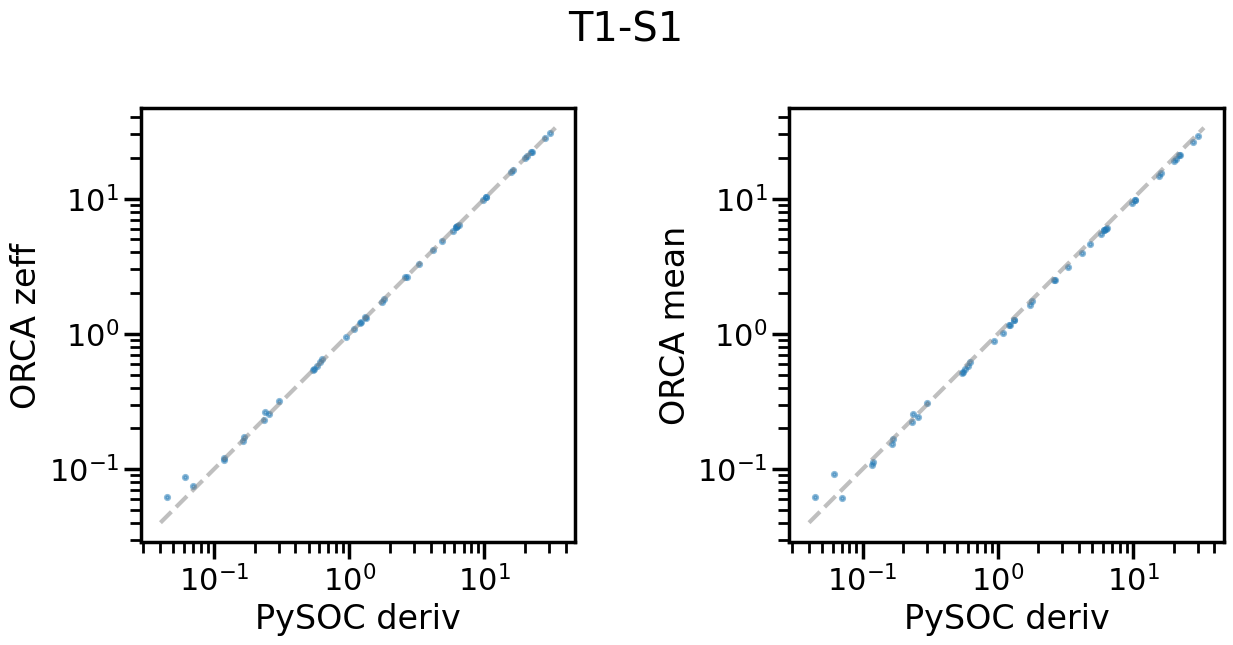

In [6]:
ncol = 2
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow, tight_layout=True)

x = y = np.linspace(min(vt1s1_pysoc_deriv) * 0.9, max(vt1s1_pysoc_deriv) * 1.1)
axes[0].plot(x, y, color="gray", alpha=0.5, linestyle="--")
axes[1].plot(x, y, color="gray", alpha=0.5, linestyle="--")

axes[0].scatter(
    vt1s1_pysoc_deriv.flatten(),
    vt1s1_orca_zeff.flatten(),
    s=10,
    alpha=0.5,
)
axes[1].scatter(
    vt1s1_pysoc_deriv.flatten(),
    vt1s1_orca_mean.flatten(),
    s=10,
    alpha=0.5,
)

axes[0].set_ylabel("ORCA zeff")
axes[1].set_ylabel("ORCA mean")
fig.suptitle("T1-S1")
for i in range(2):
    axes[i].set_xlabel("PySOC deriv")
    axes[i].set_aspect("equal")
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")

thresh = 1e0
vt1s1_pysoc_deriv_th = vt1s1_pysoc_deriv[vt1s1_pysoc_deriv > thresh]
vt1s1_orca_zeff_th = vt1s1_orca_zeff[vt1s1_pysoc_deriv > thresh]
vt1s1_orca_mean_th = vt1s1_orca_mean[vt1s1_pysoc_deriv > thresh]
diff = np.abs(vt1s1_pysoc_deriv_th - vt1s1_orca_zeff_th) / np.abs(vt1s1_pysoc_deriv_th)
print(f"Maximum relative Error ({thresh=}) is {max(diff.flatten()):.3f}", len(diff.flatten()))
diff = np.abs(vt1s1_pysoc_deriv_th - vt1s1_orca_mean_th) / np.abs(vt1s1_pysoc_deriv_th)
print(f"Maximum relative Error ({thresh=}) is {max(diff.flatten()):.3f}", len(diff.flatten()))